<a href="https://colab.research.google.com/github/ThomasGeorgeGit/Lending_Club_Loan_Data_Analysis/blob/main/Heat_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a Python code to solve 1D, 2D and 3D heat equation and plot the heat diffusion function for all the three cases using interactive python libraries.
# **1D Heat Equation**


Equation 1d

∂u/∂t = α * ∂²u/∂x²

u(x,t) is temperature at 
postion x 
and 
time t, 
α thermal diffusivity of material.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Importing necessary modules for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm




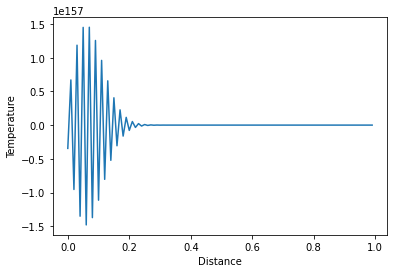

In [ ]:
def solve_1d_heat_equation(u0, alpha, dx, dt, t_final):
    # Define the domain
    M = u0.shape[0]
    x = np.arange(0, dx*M, dx)

    # Define the time step
    Nt = int(t_final / dt)
    t = np.arange(0, t_final, dt)

    # Initialize the solution matrix
    u = np.zeros((Nt+1, M))
    u[0] = u0

    # Define the coefficient matrix
    r = alpha * dt / dx**2
    A = np.diag(np.ones(M) * (1 + 2*r)) + \
        np.diag(np.ones(M-1) * (-r), k=1) + \
        np.diag(np.ones(M-1) * (-r), k=-1)

    # Time-stepping
    for n in range(Nt):
        u[n+1,:] = A.dot(u[n,:])

    return x, t, u


# Define the initial temperature profile
L = 1.0
M = 100
dx = L/M
x = np.arange(0, L, dx)
u0 = np.sin(np.pi*x)

# Define the material properties
alpha = 1.0

# Define the time step
dt = 0.001
t_final = 0.1

# Solve the 1D heat equation
x, t, u = solve_1d_heat_equation(u0, alpha, dx, dt, t_final)

def solve_1d_heat_equation(u0, alpha, dx, dt, t_final):
    # Define the domain
    M = u0.shape[0]
    x = np.arange(0, dx*M, dx)

    # Define the time step
    Nt = int(t_final / dt)
    t = np.arange(0, t_final, dt)

    # Initialize the solution matrix
    u = np.zeros((Nt+1, M))
    u[0] = u0

    # Define the coefficient matrix
    r = alpha * dt / dx**2
    A = np.diag(np.ones(M) * (1 + 2*r)) + \
        np.diag(np.ones(M-1) * (-r), k=1) + \
        np.diag(np.ones(M-1) * (-r), k=-1)

    # Time-stepping
    for n in range(Nt):
        u[n+1,:] = A.dot(u[n,:])

    return x, t, u


# Define the initial temperature profile
L = 1.0
M = 100
dx = L/M
x = np.arange(0, L, dx)
u0 = np.sin(np.pi*x)

# Define the material properties
alpha = 1.0

# Define the time step
dt = 0.001
t_final = 0.1

# Solve the 1D heat equation
x, t, u = solve_1d_heat_equation(u0, alpha, dx, dt, t_final)


# Plot the solution at the final time
plt.plot(x, u[-1])
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.show()





<ipython-input-5-fcf955702f94>:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


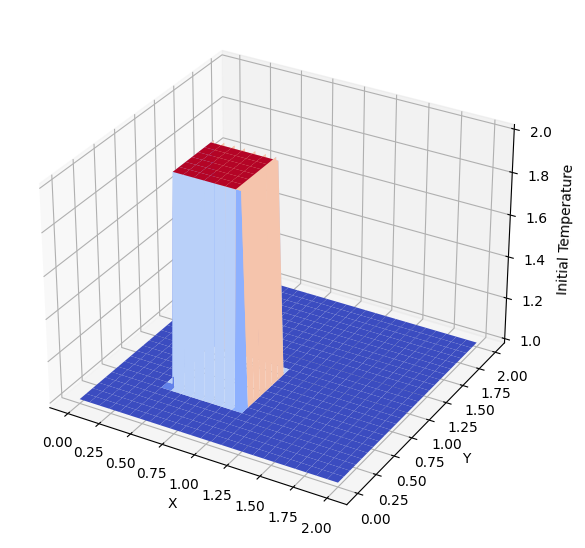

<ipython-input-5-fcf955702f94>:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


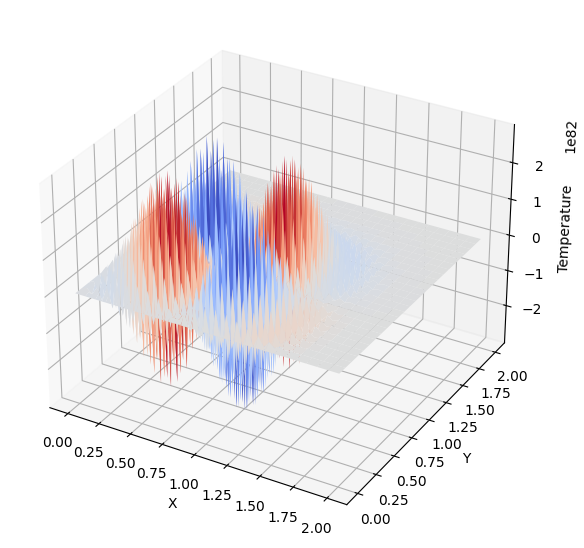

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the grid
nx = 51
ny = 51
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

# Set up the initial conditions
u = np.ones((ny, nx))
u[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2

# Plot the initial conditions
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u, cmap='coolwarm')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Initial Temperature')
plt.show()

# Set up the boundary conditions
u[0, :] = 1
u[ny - 1, :] = 1
u[:, 0] = 1
u[:, nx - 1] = 1

# Set up the iteration parameters
nt = 100
sigma = 0.25
dt = sigma * dx * dy / 0.25
alpha = 1

# Perform the iterations
for n in range(nt + 1):
    un = u.copy()
    u[1:-1, 1:-1] = un[1:-1, 1:-1] + alpha * dt / dx ** 2 * (
                un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + alpha * dt / dy ** 2 * (
                                 un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])
    u[0, :] = 1
    u[ny - 1, :] = 1
    u[:, 0] = 1
    u[:, nx - 1] = 1

# Plot the final results
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u, cmap='coolwarm')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Temperature')
plt.show()





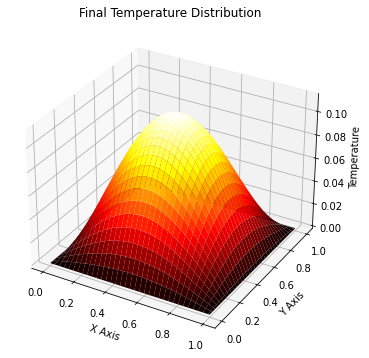

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Define parameters
Lx = 1.0 # length of x-dimension
Ly = 1.0 # length of y-dimension
nx = 101 # number of points in x-dimension
ny = 101 # number of points in y-dimension
dx = Lx / (nx - 1) # grid spacing in x-dimension
dy = Ly / (ny - 1) # grid spacing in y-dimension
x = np.linspace(0, Lx, nx) # x-coordinate values
y = np.linspace(0, Ly, ny) # y-coordinate values
T = 1.0 # total time to simulate
dt = 0.0001 # time step
alpha = 0.1 # thermal diffusivity

# Set up initial condition
U = np.zeros((nx, ny))
U[nx//4:3*nx//4, ny//4:3*ny//4] = 1.0

# Set up boundary conditions
U[0, :] = 0.0
U[nx-1, :] = 0.0
U[:, 0] = 0.0
U[:, ny-1] = 0.0

# Create empty arrays for storing the temperature values
Un = np.empty_like(U)

# Iterate over time steps
for n in range(int(T / dt)):

    # Update interior points using finite difference method
    Un[1:-1, 1:-1] = U[1:-1, 1:-1] + alpha * dt * ((U[2:, 1:-1] - 2 * U[1:-1, 1:-1] + U[:-2, 1:-1]) / dx**2 \
                             + (U[1:-1, 2:] - 2 * U[1:-1, 1:-1] + U[1:-1, :-2]) / dy**2)

    # Apply boundary conditions
    Un[0, :] = 0.0
    Un[nx-1, :] = 0.0
    Un[:, 0] = 0.0
    Un[:, ny-1] = 0.0



    # Update temperature array
    U = Un.copy()

# Plot the final temperature distribution using the "hot" colormap.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.set_title("Final Temperature Distribution")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Temperature")
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, U.T, cmap='hot')
plt.show()    